# Likelihood

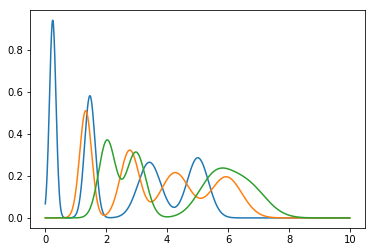

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA






features = datasets.load_iris().data   # the matrix of features
labels = datasets.load_iris().target  # the matrix of the category 

feature0 = []
feature1 = []
feature2 = []
for i in range(len(labels)):
    if labels[i] == 0:
        feature0.append(features[i])
    if labels[i] == 1:
        feature1.append(features[i])
    if labels[i] == 2:
        feature2.append(features[i])     # to separate the matrix into matrix of features with specific category

list0 = np.transpose(feature0)
list1 = np.transpose(feature1)
list2 = np.transpose(feature2)

mean00 = sum(list0[0])/len(list0[0])    # 00 means the first feature(petal length) of the 0 category
mean01 = sum(list0[1])/len(list0[1])    # 01 means the second feature(petal width) of the 0 category
mean02 = sum(list0[2])/len(list0[2])    # 02 means the third feature(sepal length) of the 0 category
mean03 = sum(list0[3])/len(list0[3])    # 03 means the fourth feature(sepal length) of the 0 category

mean10 = sum(list1[0])/len(list1[0])
mean11 = sum(list1[1])/len(list1[1])
mean12 = sum(list1[2])/len(list1[2])
mean13 = sum(list1[3])/len(list1[3])   

mean20 = sum(list2[0])/len(list2[0])
mean21 = sum(list2[1])/len(list2[1])
mean22 = sum(list2[2])/len(list2[2])
mean23 = sum(list2[3])/len(list2[3])  






temp00 = 0
temp01 = 0
temp02 = 0
temp03 = 0
for x,i,j,k in zip(list0[0],list0[1],list0[2],list0[3]):
    temp00 += (np.power((x - mean00),2))
    temp01 += (np.power((i - mean01),2))
    temp02 += (np.power((j - mean02),2))
    temp03 += (np.power((k - mean03),2))
sig00 = temp00/len(list0[0])
sig01 = temp01/len(list0[1])           # sigma square of each feature of each category
sig02 = temp02/len(list0[2])
sig03 = temp03/len(list0[3])          # this sig here should be the sigma square

temp10 = 0
temp11 = 0
temp12 = 0
temp13 = 0
for x,i,j,k in zip(list1[0],list1[1],list1[2],list1[3]):
    temp10 += (np.power((x - mean10),2))
    temp11 += (np.power((i - mean11),2))
    temp12 += (np.power((j - mean12),2))
    temp13 += (np.power((k - mean13),2))
sig10 = temp10/len(list1[0])
sig11 = temp11/len(list1[1])
sig12 = temp12/len(list1[2])
sig13 = temp13/len(list1[3])

temp20 = 0
temp21 = 0
temp22 = 0
temp23 = 0
for x,i,j,k in zip(list2[0],list2[1],list2[2],list2[3]):
    temp20 += (np.power((x - mean20),2))
    temp21 += (np.power((i - mean21),2))
    temp22 += (np.power((j - mean22),2))
    temp23 += (np.power((k - mean23),2))
sig20 = temp20/len(list2[0])
sig21 = temp21/len(list2[1])
sig22 = temp22/len(list2[2])
sig23 = temp23/len(list2[3])





def gaussian(x, mean, sig):
    return np.exp(-np.power(x - mean, 2) / (2 * sig)) / np.sqrt(np.abs(2*np.pi*sig))

plt.plot(np.arange(0,10,0.01),
         [(gaussian(i,mean00,sig00)+gaussian(i,mean01,sig01)+gaussian(i,mean02,sig02)+gaussian(i,mean03,sig03))/4
          for i in np.arange(0,10,0.01)])
plt.plot(np.arange(0,10,0.01),
         [(gaussian(i,mean10,sig10)+gaussian(i,mean11,sig11)+gaussian(i,mean12,sig12)+gaussian(i,mean13,sig13))/4 
          for i in np.arange(0,10,0.01)])
plt.plot(np.arange(0,10,0.01),
         [(gaussian(i,mean20,sig20)+gaussian(i,mean21,sig21)+gaussian(i,mean22,sig22)+gaussian(i,mean23,sig23))/4
          for i in np.arange(0,10,0.01)])
plt.show()


# Priori

In [2]:
PrC0 = labels.tolist().count(0)/len(labels)
PrC1 = labels.tolist().count(1)/len(labels)
PrC2 = labels.tolist().count(2)/len(labels)  # the priori probability of each category

# Posterior

In [3]:
train0 = []
test0 = []
for i in range(len(feature0)):
    if i < 0.8*len(feature0):  # split the dataset into two subsets for training and testing(40 samples per category)
        train0.append(feature0[i])
    else:
        test0.append(feature0[i])

train1 = []
test1 = []
for i in range(len(feature1)):
    if i < 0.8*len(feature1):
        train1.append(feature1[i])
    else:
        test1.append(feature1[i])

train2 = []
test2 = []
for i in range(len(feature2)):
    if i < 0.8*len(feature2):
        train2.append(feature2[i])
    else:
        test2.append(feature2[i])   

    
test0 = np.transpose(test0)
test1 = np.transpose(test1)
test2 = np.transpose(test2)

post = []
for i,j,k,l in zip(test0[0], test0[1], test0[2], test0[3]):
    post.append(PrC0*(gaussian(i,mean00,sig00)+gaussian(j,mean01,sig01)  
                      +gaussian(k,mean02,sig02)+gaussian(l,mean03,sig03))/4)
    post.append(PrC1*(gaussian(i,mean10,sig10)+gaussian(j,mean11,sig11)
                      +gaussian(k,mean12,sig12)+gaussian(l,mean13,sig13))/4)
    post.append(PrC2*(gaussian(i,mean20,sig20)+gaussian(j,mean21,sig21)
                      +gaussian(k,mean22,sig22)+gaussian(l,mean23,sig23))/4)
    
# the priori times the likelihood equals the posterior given X
    
    
for i,j,k,l in zip(test1[0], test1[1], test1[2], test1[3]):
    post.append(PrC0*(gaussian(i,mean00,sig00)+gaussian(j,mean01,sig01)
                      +gaussian(k,mean02,sig02)+gaussian(l,mean03,sig03))/4)
    post.append(PrC1*(gaussian(i,mean10,sig10)+gaussian(j,mean11,sig11)
                      +gaussian(k,mean12,sig12)+gaussian(l,mean13,sig13))/4)
    post.append(PrC2*(gaussian(i,mean20,sig20)+gaussian(j,mean21,sig21)
                      +gaussian(k,mean22,sig22)+gaussian(l,mean23,sig23))/4)

for i,j,k,l in zip(test2[0], test2[1], test2[2], test2[3]):
    post.append(PrC0*(gaussian(i,mean00,sig00)+gaussian(j,mean01,sig01)
                      +gaussian(k,mean02,sig02)+gaussian(l,mean03,sig03))/4)
    post.append(PrC1*(gaussian(i,mean10,sig10)+gaussian(j,mean11,sig11)
                      +gaussian(k,mean12,sig12)+gaussian(l,mean13,sig13))/4)
    post.append(PrC2*(gaussian(i,mean20,sig20)+gaussian(j,mean21,sig21)
                      +gaussian(k,mean22,sig22)+gaussian(l,mean23,sig23))/4)

post = np.reshape(post,(30,3));
print(post)


[[0.5765738  0.01891988 0.02899212]
 [0.42961967 0.03532576 0.01142967]
 [0.50581675 0.04176791 0.08117962]
 [0.32393573 0.0190949  0.02899225]
 [0.25872585 0.01750543 0.00689593]
 [0.58084058 0.0868598  0.1047238 ]
 [0.57357244 0.01750291 0.00689593]
 [0.59101688 0.0431906  0.08141449]
 [0.61024779 0.03119758 0.01435724]
 [0.64720496 0.03712146 0.064018  ]
 [0.04336895 0.34369881 0.0720903 ]
 [0.04839633 0.35598499 0.16486225]
 [0.01554928 0.35411644 0.07884337]
 [0.09634895 0.09716804 0.01351737]
 [0.03677345 0.39595408 0.09376978]
 [0.06088111 0.34876735 0.12737407]
 [0.04751101 0.39573154 0.12720762]
 [0.03460029 0.39451285 0.15291449]
 [0.09643804 0.17945726 0.03819061]
 [0.03621193 0.40069363 0.11452793]
 [0.06177726 0.08327573 0.25640468]
 [0.06177658 0.08584701 0.25984242]
 [0.02155582 0.18343979 0.2492163 ]
 [0.07458148 0.05677917 0.25422038]
 [0.08392965 0.04683697 0.19921988]
 [0.04769787 0.11191785 0.27880514]
 [0.00465837 0.14630844 0.22850332]
 [0.0477071  0.12647559 0.32

# Confusion matrix

In [34]:
indices = []
for i in post:
    indices.append(np.argmax(i))
     
matrix = np.array([[0]*3]*3);
for i in range(10):
    if indices[i] == 0:           # to test every 10 testing samples
        matrix[0][0] += 1
    elif indices[i] == 1:
        matrix[0][1] += 1
    elif indices[i] == 2:
        matrix[0][2] += 1
        
for i in range(10,20):
    if indices[i] == 0:
        matrix[1][0] += 1
    elif indices[i] == 1:
        matrix[1][1] += 1
    elif indices[i] == 2:
        matrix[1][2] += 1
        
for i in range(20,30):
    if indices[i] == 0:
        matrix[2][0] += 1
    elif indices[i] == 1:
        matrix[2][1] += 1
    elif indices[i] == 2:
        matrix[2][2] += 1
print(matrix)
    


[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


# ROC Curve

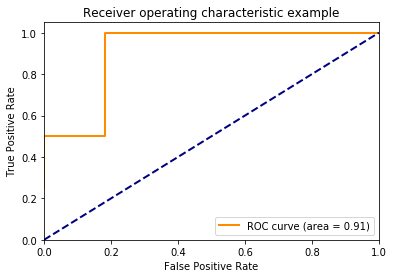

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# PR Curve

In [9]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))


ValueError: multilabel-indicator format is not supported